In [1]:
import sys
import os
from pathlib import Path
import numpy as np

sys.path.append(Path.cwd().parent.joinpath("source").as_posix())

from outliers_remover import OutliersRemover

from utils import read_tiff, plot_sar, save_tiff
import plotly.offline as pyo
import plotly.graph_objects as go

# Set notebook mode to work in offline
pyo.init_notebook_mode()

import matplotlib.pyplot as plt
%matplotlib widget
import re

import seaborn as sns

import random
random.seed(1)


In [2]:
data_dir = "/mnt/SAR_images/processed/RCR/cropped"
image_paths = []
images = []
for file in sorted(os.listdir(data_dir)):
    if file.endswith(".tif"):
        filepath = os.path.join(data_dir, file)
        image_paths.append(filepath)
        images.append(read_tiff(filepath))

images = np.array(images)

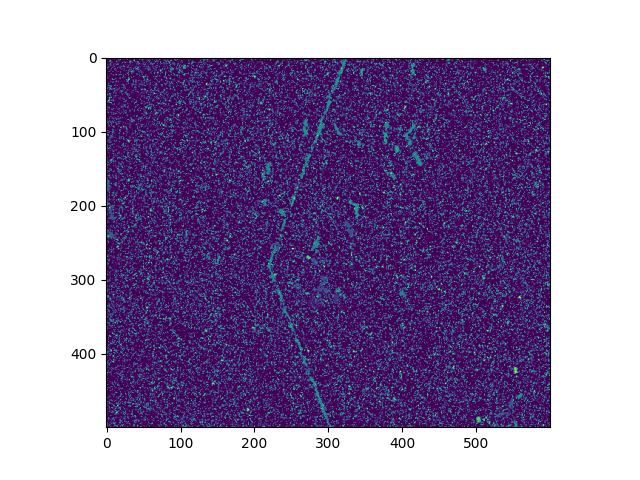

In [3]:
index_shadows = read_tiff('/mnt/SAR_images/processed/shadows/cropped/detected_shadows_image_indexes.tif')
colors = np.array([[0,0,0]] + sns.color_palette("rocket",n_colors=int(np.max(index_shadows) +1)))
color_index_shadows = colors[index_shadows.astype(int) + 1]
plt.imshow(index_shadows)
# plt.imshow(color_index_shadows, interpolation='nearest')
plt.show()
# plt.imsave( '/mnt/hdd/SAR_images/shadows/cropped/colored_index.png', color_index_shadows)

In [4]:
min_image = np.min(images, axis=0)
deforested_patches = np.argmin(images[37:38], axis =0)
# for i,j,k in np.ndindex(images.shape):
#     if images[i,j,k] == min_image[j,k]:
#         deforested_patches[j,k] = i
deforested_patches[min_image  > -4] = -1
print(min_image)
print(deforested_patches)

[[-2.65236378 -2.50957084 -3.43098092 ... -4.96818113 -4.95363665
  -4.30278111]
 [-4.39481163 -2.94913626 -4.12228823 ... -4.09793282 -5.31298971
  -3.58416009]
 [-3.43495536 -4.24328804 -3.26224518 ... -3.5134809  -4.9328413
  -3.45039582]
 ...
 [-3.48817253 -3.79754567 -3.75845218 ... -3.13763428 -5.31869125
  -3.78241777]
 [-3.52410412 -4.02792311 -4.76884365 ... -2.56480408 -4.59570503
  -4.06697226]
 [-3.36392784 -3.15644932 -4.14134741 ... -3.23280716 -5.85715103
  -4.45401478]]
[[-1 -1 -1 ...  0  0  0]
 [ 0 -1  0 ...  0  0 -1]
 [-1  0 -1 ... -1  0 -1]
 ...
 [-1 -1 -1 ... -1  0 -1]
 [-1  0  0 ... -1  0  0]
 [-1 -1  0 ... -1  0  0]]


In [5]:
print(image_paths[37:41])

['/mnt/SAR_images/processed/RCR/cropped/rcr_20180224.tif', '/mnt/SAR_images/processed/RCR/cropped/rcr_20180308.tif', '/mnt/SAR_images/processed/RCR/cropped/rcr_20180320.tif', '/mnt/SAR_images/processed/RCR/cropped/rcr_20180811.tif']


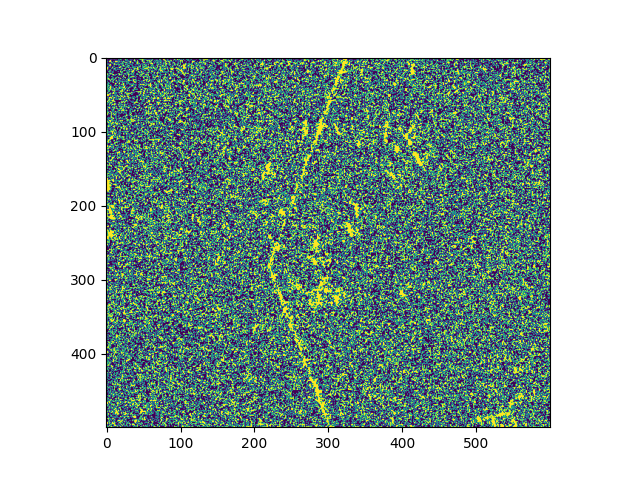

In [6]:
plt.imshow(deforested_patches)
plt.show()

Saving image at /tmp/tmp.tif


300000it [00:00, 301277.72it/s]


Saving image at /tmp/filtered_shadow_image_threshold_30.tif


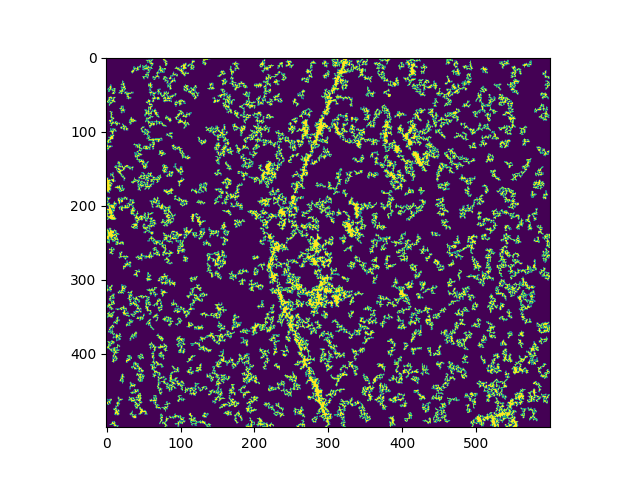

In [7]:
threshold = 30

save_tiff(deforested_patches.astype(index_shadows.dtype), '/tmp/', 'tmp.tif')
outliers_remover = OutliersRemover(
    filepath='/tmp/tmp.tif',
    threshold=threshold,
    output_dir='/tmp/',
    output_filename=f"filtered_shadow_image_threshold_{threshold}.tif",
    dark_value=-1
)
new_image, detected_coords_of_shadows, detected_groups_of_shadows = outliers_remover.main()
plt.imshow(new_image)
plt.show()